# Train

## Import dataset

In [23]:
import pandas as pd

dataset_path = 'ruby-vs-milana-2024-10-30-full-fix.json'
df = pd.read_json(dataset_path, orient='records')
df

,asopp,char_defence_defence_black,char_defence_defence_blue,char_defence_defence_brown,char_defence_defence_cyan,char_defence_defence_gray,char_defence_defence_green,char_defence_defence_orange,char_defence_defence_pink,char_defence_defence_red,...,opp_skill2_colour,opp_skill2_cooldown,opp_skill2_is_available,opp_skill2_unlock_turn,opp_skill3_colour,opp_skill3_cooldown,opp_skill3_is_available,opp_skill3_unlock_turn,result,turnnum
0,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,False,8,1,6
1,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,False,8,1,7
2,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,True,8,1,9
3,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,True,8,1,10
4,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,True,8,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34024,False,0,-2,1,1,0,0,-1,0,4,...,white,2,False,0,cyan,0,False,8,1,5
34025,False,0,-2,1,1,0,0,-1,0,4,...,white,2,False,0,cyan,0,False,8,0,4
34026,False,0,-2,1,1,0,0,-1,0,4,...,white,2,False,0,cyan,0,False,8,1,3
34027,False,0,-2,1,1,0,0,-1,0,4,...,white,2,False,0,cyan,0,False,8,1,2


In [24]:
print(df.loc[16646].to_string())

asopp                                          False
char_defence_defence_black                         0
char_defence_defence_blue                         -2
char_defence_defence_brown                         1
char_defence_defence_cyan                          1
char_defence_defence_gray                          0
char_defence_defence_green                         0
char_defence_defence_orange                       -1
char_defence_defence_pink                          0
char_defence_defence_red                           4
char_defence_defence_violet                        0
char_defence_defence_white                         0
char_defence_defence_yellow                        2
char_effect_euphoria_euphoricheal              False
char_effect_euphoria_euphoricsource_amount         0
char_effect_euphoria_ultimateearly_amount          0
char_effect_milana_mintmist_turnsleft              0
char_effect_milana_stolenhp_amount                 0
char_effect_ruby_cannotheal_turnsleft         

In [25]:
df = df.drop_duplicates()
# df = df.sample(frac=1)
df

,asopp,char_defence_defence_black,char_defence_defence_blue,char_defence_defence_brown,char_defence_defence_cyan,char_defence_defence_gray,char_defence_defence_green,char_defence_defence_orange,char_defence_defence_pink,char_defence_defence_red,...,opp_skill2_colour,opp_skill2_cooldown,opp_skill2_is_available,opp_skill2_unlock_turn,opp_skill3_colour,opp_skill3_cooldown,opp_skill3_is_available,opp_skill3_unlock_turn,result,turnnum
0,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,False,8,1,6
1,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,False,8,1,7
2,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,True,8,1,9
3,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,True,8,1,10
4,False,0,-2,1,1,0,0,-1,0,4,...,white,2,True,0,cyan,0,True,8,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33713,False,0,-2,1,1,0,0,-1,0,4,...,white,2,False,0,cyan,0,False,8,0,4
33714,False,0,-2,1,1,0,0,-1,0,4,...,white,2,False,0,cyan,0,False,8,1,3
34026,False,0,-2,1,1,0,0,-1,0,4,...,white,2,False,0,cyan,0,False,8,1,3
34027,False,0,-2,1,1,0,0,-1,0,4,...,white,2,False,0,cyan,0,False,8,1,2


In [26]:
weights = df['result'].count() / df.groupby('result')['result'].count() / 4
weights

,result
result,
0,4.833333
1,0.309829
2,8.307292
3,2.246479


In [27]:
target = df.pop('result')
target

,result
0,1
1,1
2,1
3,1
4,1
...,...
33713,0
33714,1
34026,1
34027,1


In [28]:
numeric_feature_names = [
    'char_defence_defence_black',
    'char_defence_defence_blue',
    'char_defence_defence_brown',
    'char_defence_defence_cyan',
    'char_defence_defence_gray',
    'char_defence_defence_green',
    'char_defence_defence_orange',
    'char_defence_defence_pink',
    'char_defence_defence_red',
    'char_defence_defence_violet',
    'char_defence_defence_white',
    'char_defence_defence_yellow',
    'char_effect_euphoria_euphoricsource_amount',
    'char_effect_euphoria_ultimateearly_amount',
    'char_effect_milana_mintmist_turnsleft',
    'char_effect_milana_stolenhp_amount',
    'char_effect_ruby_cannotheal_turnsleft',
    'char_effect_ruby_doubledamage_turnsleft',
    'char_effect_speed_blacktokens_number',
    'char_effect_speed_greentokens_number',
    'char_effect_structure_iboost_amount',
    'char_effect_structure_slayers_threshold',
    'char_effect_z89_ultimateslow_amount',
    'char_hp',
    'char_maxhp',
    'char_skill0_cooldown',
    'char_skill0_unlock_turn',
    'char_skill1_cooldown',
    'char_skill1_unlock_turn',
    'char_skill2_cooldown',
    'char_skill2_unlock_turn',
    'char_skill3_cooldown',
    'char_skill3_unlock_turn',
    'opp_defence_defence_black',
    'opp_defence_defence_blue',
    'opp_defence_defence_brown',
    'opp_defence_defence_cyan',
    'opp_defence_defence_gray',
    'opp_defence_defence_green',
    'opp_defence_defence_orange',
    'opp_defence_defence_pink',
    'opp_defence_defence_red',
    'opp_defence_defence_violet',
    'opp_defence_defence_white',
    'opp_defence_defence_yellow',
    'opp_effect_euphoria_euphoricsource_amount',
    'opp_effect_euphoria_ultimateearly_amount',
    'opp_effect_milana_mintmist_turnsleft',
    'opp_effect_milana_stolenhp_amount',
    'opp_effect_ruby_cannotheal_turnsleft',
    'opp_effect_ruby_doubledamage_turnsleft',
    'opp_effect_speed_blacktokens_number',
    'opp_effect_speed_greentokens_number',
    'opp_effect_structure_iboost_amount',
    'opp_effect_structure_slayers_threshold',
    'opp_effect_z89_ultimateslow_amount',
    'opp_hp',
    'opp_maxhp',
    'opp_skill0_cooldown',
    'opp_skill0_unlock_turn',
    'opp_skill1_cooldown',
    'opp_skill1_unlock_turn',
    'opp_skill2_cooldown',
    'opp_skill2_unlock_turn',
    'opp_skill3_cooldown',
    'opp_skill3_unlock_turn',
    'turnnum'
]
binary_feature_names = [
    'char_effect_euphoria_euphoricheal',
    'char_effect_speed_damagereduced',
    'char_effect_speed_defencereduced',
    'char_effect_speed_spedup',
    'char_effect_storyteller_controlled',
    'char_effect_structure_lastchance',
    'char_skill0_is_available',
    'char_skill1_is_available',
    'char_skill2_is_available',
    'char_skill3_is_available',
    'goingfirst',
    'opp_effect_euphoria_euphoricheal',
    'opp_effect_speed_damagereduced',
    'opp_effect_speed_defencereduced',
    'opp_effect_speed_spedup',
    'opp_effect_storyteller_controlled',
    'opp_effect_structure_lastchance',
    'opp_skill0_is_available',
    'opp_skill1_is_available',
    'opp_skill2_is_available',
    'opp_skill3_is_available'
]
categorical_feature_names = [
    'char_effect_storyteller_cannotuse_colour',
    'char_lastusedskill',
    'char_number',
    'char_skill0_colour',
    'char_skill1_colour',
    'char_skill2_colour',
    'char_skill3_colour',
    'opp_effect_storyteller_cannotuse_colour',
    'opp_lastusedskill',
    'opp_number',
    'opp_skill0_colour',
    'opp_skill1_colour',
    'opp_skill2_colour',
    'opp_skill3_colour'
]

In [29]:
import tensorflow as tf

inputs = {}
for name, column in df.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_feature_names or
        name in binary_feature_names):
    dtype = tf.int64
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'asopp': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=asopp>,
 'char_defence_defence_black': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=char_defence_defence_black>,
 'char_defence_defence_blue': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=char_defence_defence_blue>,
 'char_defence_defence_brown': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=char_defence_defence_brown>,
 'char_defence_defence_cyan': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=char_defence_defence_cyan>,
 'char_defence_defence_gray': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=char_defence_defence_gray>,
 'char_defence_defence_green': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=char_defence_defence_green>,
 'char_defence_defence_orange': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=char_defence_defence_orange>,
 'char_defence_defence_pink': <KerasTensor shape=(None, 1), dt

In [30]:
preprocessed = []

for name in binary_feature_names:
  inp = inputs[name]
  preprocessed.append(inp)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_euphoria_euphoricheal>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_speed_damagereduced>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_speed_defencereduced>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_speed_spedup>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_storyteller_controlled>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_structure_lastchance>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill0_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill1_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill2_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill3_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=goingf

In [31]:
import numpy as np

numeric_features_dict = {key: value.to_numpy()[:, tf.newaxis] for key, value in dict(df[numeric_feature_names]).items()}

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.concatenate([value for key, value in sorted(numeric_features_dict.items())], axis=1))

In [32]:
numeric_inputs = []
for name in numeric_feature_names:
  numeric_inputs.append(inputs[name])

numeric_inputs = tf.keras.layers.Concatenate(axis=-1)(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_euphoria_euphoricheal>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_speed_damagereduced>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_speed_defencereduced>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_speed_spedup>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_storyteller_controlled>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_structure_lastchance>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill0_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill1_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill2_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill3_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=goingf

In [33]:
for name in categorical_feature_names:
  vocab = sorted(set(df[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if len(vocab) < 2:
    continue

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name]
  x = lookup(x)
  preprocessed.append(x)

name: char_effect_storyteller_cannotuse_colour
vocab: ['']

name: char_lastusedskill
vocab: [-1, 0, 1, 2]

name: char_number
vocab: [10]

name: char_skill0_colour
vocab: ['yellow']

name: char_skill1_colour
vocab: ['red']

name: char_skill2_colour
vocab: ['cyan']

name: char_skill3_colour
vocab: ['red']

name: opp_effect_storyteller_cannotuse_colour
vocab: ['']

name: opp_lastusedskill
vocab: [-1, 0, 1, 2, 3]

name: opp_number
vocab: [51]

name: opp_skill0_colour
vocab: ['green']

name: opp_skill1_colour
vocab: ['white']

name: opp_skill2_colour
vocab: ['white']

name: opp_skill3_colour
vocab: ['cyan']



In [34]:
preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_euphoria_euphoricheal>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_speed_damagereduced>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_speed_defencereduced>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_speed_spedup>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_storyteller_controlled>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_effect_structure_lastchance>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill0_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill1_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill2_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=char_skill3_is_available>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=None, name=goingf

In [35]:
preprocessed_result = tf.keras.layers.Concatenate(axis=1)(preprocessed)
preprocessed_result

<KerasTensor shape=(None, 97), dtype=float32, sparse=False, name=keras_tensor_20>

In [36]:
preprocessor = tf.keras.Model(inputs, preprocessed_result)

In [37]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 97), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.24954171,  0.66034096,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.55614895,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
  

## Train

In [63]:
!rm -r models/milana-vs-ruby

In [39]:
!pip install keras_tuner

In [64]:
import keras_tuner as kt

def build_model(units, layers, lr):
    body = tf.keras.Sequential()

    for i in range(layers):
        body.add(tf.keras.layers.Dense(units, activation='relu'))

    body.add(tf.keras.layers.Dense(4))

    result = body(preprocessor(inputs))
    model = tf.keras.Model(inputs, result)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return model

In [65]:
def model_builder(hp):
    hp_units = hp.Int('units', min_value=256, max_value=512, step=32)
    layers = hp.Choice('layers', values=[1, 2, 3])
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

    return build_model(hp_units, layers, hp_learning_rate)

In [66]:
tuner = kt.Hyperband(model_builder,
                    #  objective='val_accuracy',
                     objective='accuracy',
                     max_epochs=100,
                     factor=3,
                     directory='models/milana-vs-ruby',
                     project_name='battler-ml')


In [67]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [68]:
# tuner.search(dict(df), target, epochs=100, validation_split=0.2, callbacks=[stop_early])
tuner.search(dict(df), target, epochs=100, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of layers is
{best_hps.get('layers')} and the optimal number of units in the first
densely-connected layer is {best_hps.get('units')} and the optimal learning rate
for the optimizer is {best_hps.get('learning_rate')}.
""")

Trial 72 Complete [00h 00m 09s]
accuracy: 0.8068965673446655

Best accuracy So Far: 0.9542319774627686
Total elapsed time: 00h 12m 13s

The hyperparameter search is complete. The optimal number of layers is
3 and the optimal number of units in the first
densely-connected layer is 384 and the optimal learning rate
for the optimizer is 0.001.



In [72]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
# model = build_model(1024, 4, 0.01)
# model = baseline_model(0.0001)

In [73]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ asopp (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_bla… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_blue │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_bro… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_cyan │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_gray │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_gre… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_ora… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_pink │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_red  │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_vio… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_whi… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_defence_defence_yel… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_effect_euphoria_

 Total params: 334,987 (1.28 MB)

 Trainable params: 334,852 (1.28 MB)

 Non-trainable params: 135 (544.00 B)

In [74]:
# history = model.fit(dict(df), target, epochs=500, validation_split=0.2)
history = model.fit(dict(df), target, epochs=500)

# val_acc_per_epoch = history.history['val_accuracy']
# best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
acc_per_epoch = history.history['accuracy']
best_epoch = acc_per_epoch.index(max(acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8587 - loss: 0.3905
Epoch 2/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9483 - loss: 0.1327
Epoch 3/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9622 - loss: 0.0975
Epoch 4/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9621 - loss: 0.0929
Epoch 5/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9737 - loss: 0.0676
Epoch 6/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9805 - loss: 0.0499
Epoch 7/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9741 - loss: 0.0629
Epoch 8/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9800 - loss: 0.0509
Epoch 9/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9817 - loss: 0.0545
Epoch 10/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9800 - loss: 0.0580
Epoch 11/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9848 - loss: 0.0410
Epoch 12/500
200/200 ━━━━━━━━━━━━━━━━━━

In [75]:
pred = np.argmax(model(dict(df)).numpy(), axis=1)
tf.math.confusion_matrix(target, pred)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 330,    0,    0,    0],
       [   0, 5148,    0,    0],
       [   0,    0,  192,    0],
       [   0,    0,    0,  710]], dtype=int32)>

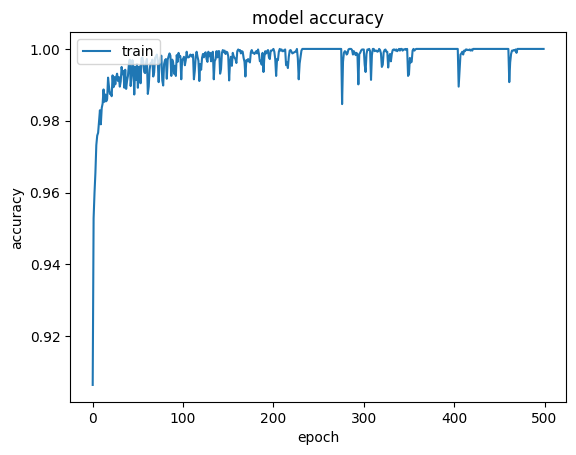

In [77]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

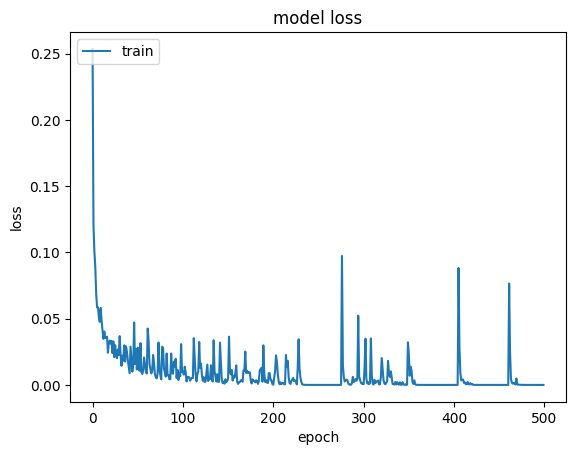

In [78]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [79]:
model.save('ruby-vs-milana-noval.keras')
model.export('ruby-vs-milana-noval')

Saved artifact at 'ruby-vs-milana-noval'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 1), dtype=tf.float32, name='asopp'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence_black'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence_blue'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence_brown'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence_cyan'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence_gray'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence_green'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence_orange'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence_pink'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence_red'), TensorSpec(shape=(None, 1), dtype=tf.float32, name='char_defence_defence

In [80]:
!zip -r ruby-vs-milana-noval.zip ruby-vs-milana-noval/

  adding: ruby-vs-milana-noval/ (stored 0%)
  adding: ruby-vs-milana-noval/variables/ (stored 0%)
  adding: ruby-vs-milana-noval/variables/variables.index (deflated 62%)
  adding: ruby-vs-milana-noval/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: ruby-vs-milana-noval/assets/ (stored 0%)
  adding: ruby-vs-milana-noval/saved_model.pb (deflated 90%)
  adding: ruby-vs-milana-noval/fingerprint.pb (stored 0%)
